In [46]:
import numpy as np
import time
import pandas as pd

In [47]:
rf_path = "./rt-ifttt/rt-ifttt.csv"
rf_data = pd.read_csv(rf_path)

In [48]:
rf_data

Unnamed: 0  OutdoorUV  OutdoorVisibleRay_Lux  OutdoorTemperature_C  \
0              0       4.21           51624.113281                 30.68   
1              1       4.20           51675.531250                 30.63   
2              2       4.24           52035.460938                 30.76   
3              3       4.23           51984.042969                 30.75   
4              4       4.24           51881.207031                 30.87   
...          ...        ...                    ...                   ...   
9995        9995       0.73            9101.063477                 20.71   
9996        9996       0.74            9101.063477                 20.72   
9997        9997       0.74            9049.645508                 20.73   
9998        9998       0.74            9101.063477                 20.73   
9999        9999       0.74            9101.063477                 20.74   

      OutdoorHumidity_pct  OutdoorPressure_hPa  IndoorUV  \
0               27.867188              1012.76      0.07   
1               27.899414              1012.79      0.07   
2               27.815430              1012.74      0.05   
3               27.781250              1012.74      0.05   
4               27.731445              1012.70      0.05   
...                   ...                  ...       ...   
9995            40.255859              1013.13      0.06   
9996            40.235352              1013.11      0.04   
9997            40.368164              1013.15      0.03   
9998            40.423828              1013.08      0.05   
9999            40.425781              1013.08      0.05   

      IndoorVisibleRay_Lux  IndoorTemperature_C  IndoorHumidity_pct  \
0               925.531921                27.26           33.154297   
1               771.276611                27.26           33.232422   
2               668.439697                27.29           33.145508   
3               617.021301                27.30           33.145508   
4               617.021301                27.29           33.123047   
...                    ...                  ...                 ...   
9995            565.602844                27.24           30.381836   
9996            617.021301                27.24           30.392578   
9997            565.602844                27.24           30.381836   
9998            565.602844                27.24           30.415039   
9999            668.439697                27.25           30.282227   

      IndoorPressure_hPa  
0                1011.81  
1                1011.79  
2                1011.78  
3                1011.78  
4                1011.72  
...                  ...  
9995             1012.20  
9996             1012.15  
9997             1012.18  
9998             1012.18  
9999             1012.11  

[10000 rows x 11 columns]

In [49]:
print("检查每一列是否存在空值：")
print(rf_data.isna().any())

检查每一列是否存在空值：
Unnamed: 0               False
OutdoorUV                False
OutdoorVisibleRay_Lux    False
OutdoorTemperature_C     False
OutdoorHumidity_pct      False
OutdoorPressure_hPa      False
IndoorUV                 False
IndoorVisibleRay_Lux     False
IndoorTemperature_C      False
IndoorHumidity_pct       False
IndoorPressure_hPa       False
dtype: bool


In [50]:
weather_humidity_path = "./Historical Hourly Weather Data 2012-2017/humidity.csv"
weather_pressure_path = "./Historical Hourly Weather Data 2012-2017/pressure.csv"
weather_temperature_path = "./Historical Hourly Weather Data 2012-2017/temperature.csv"
weather_wind_speed_path = "./Historical Hourly Weather Data 2012-2017/wind_speed.csv"
weather_humidity_data = pd.read_csv(weather_humidity_path)
weather_pressure_data = pd.read_csv(weather_pressure_path)
weather_temperature_data = pd.read_csv(weather_temperature_path)
weather_wind_speed_data = pd.read_csv(weather_wind_speed_path)
weather_data = [weather_humidity_data, weather_pressure_data, weather_temperature_data, weather_wind_speed_data]

In [51]:
for idx, dataset in enumerate(weather_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
datetime             False
Vancouver             True
Portland              True
San Francisco         True
Seattle               True
Los Angeles           True
San Diego             True
Las Vegas             True
Phoenix               True
Albuquerque           True
Denver                True
San Antonio           True
Dallas                True
Houston               True
Kansas City           True
Minneapolis           True
Saint Louis           True
Chicago               True
Nashville             True
Indianapolis          True
Atlanta               True
Detroit               True
Jacksonville          True
Charlotte             True
Miami                 True
Pittsburgh            True
Toronto               True
Philadelphia          True
New York              True
Montreal              True
Boston                True
Beersheba             True
Tel Aviv District     True
Eilat                 True
Haifa                 True
Nahariyya             True
Jerusa

In [52]:
for dataset in weather_data:
    for col_name in dataset.columns:
        # 处理空值
        if dataset[col_name].isnull().any():
            # 用平均值填充
            dataset.fillna({col_name: int(dataset[col_name].mean())}, inplace=True)

In [53]:
for idx, dataset in enumerate(weather_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
datetime             False
Vancouver            False
Portland             False
San Francisco        False
Seattle              False
Los Angeles          False
San Diego            False
Las Vegas            False
Phoenix              False
Albuquerque          False
Denver               False
San Antonio          False
Dallas               False
Houston              False
Kansas City          False
Minneapolis          False
Saint Louis          False
Chicago              False
Nashville            False
Indianapolis         False
Atlanta              False
Detroit              False
Jacksonville         False
Charlotte            False
Miami                False
Pittsburgh           False
Toronto              False
Philadelphia         False
New York             False
Montreal             False
Boston               False
Beersheba            False
Tel Aviv District    False
Eilat                False
Haifa                False
Nahariyya            False
Jerusa

In [54]:
bridge_21416_DPM_path = "./2021-04-16/2021-04-16 00-DPM.csv"
bridge_21416_HPT_path = "./2021-04-16/2021-04-16 00-HPT.csv"
bridge_21416_RHS_path = "./2021-04-16/2021-04-16 00-RHS.csv"
bridge_21416_ULT_path = "./2021-04-16/2021-04-16 00-ULT.csv"
bridge_21416_VIB_path = "./2021-04-16/2021-04-16 00-VIB.csv"
bridge_21416_VIC_path = "./2021-04-16/2021-04-16 00-VIC.csv"
bridge_21416_DPM_data = pd.read_csv(bridge_21416_DPM_path)
bridge_21416_HPT_data = pd.read_csv(bridge_21416_HPT_path)
bridge_21416_RHS_data = pd.read_csv(bridge_21416_RHS_path)
bridge_21416_ULT_data = pd.read_csv(bridge_21416_ULT_path)
bridge_21416_VIB_data = pd.read_csv(bridge_21416_VIB_path)
bridge_21416_VIC_data = pd.read_csv(bridge_21416_VIC_path)

bridge_data = [bridge_21416_DPM_data, bridge_21416_HPT_data, bridge_21416_RHS_data, bridge_21416_ULT_data, bridge_21416_VIB_data,bridge_21416_VIC_data]

In [55]:
for idx, dataset in enumerate(bridge_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
00:00:00.000    False
 103.761        False
 101.761        False
Unnamed: 3       True
dtype: bool
检查第 1 个数据集的每一列是否存在空值：
00:00:00.000    False
4854.628        False
4799.306        False
3366.273        False
3323.542        False
2026.681        False
1960.522        False
1204.850        False
1158.819        False
1637.626        False
1566.018        False
 960.728        False
 929.909        False
Unnamed: 13      True
dtype: bool
检查第 2 个数据集的每一列是否存在空值：
00:00:00.000    False
  24.478        False
  48.877        False
  24.611        False
  55.545        False
  24.291        False
  42.173        False
  24.401        False
  43.895        False
  24.864        False
  78.694        False
  24.850        False
  78.495        False
Unnamed: 13      True
dtype: bool
检查第 3 个数据集的每一列是否存在空值：
00:00:00.000    False
   5.629        False
 370.062        False
Unnamed: 3       True
dtype: bool
检查第 4 个数据集的每一列是否存在空值：
00:00:00.000    False
  -0.387        False
   0.4

In [56]:
for idx in range(len(weather_data)):
    weather_data[idx] = weather_data[idx].drop(weather_data[idx].columns[0], axis=1)

In [57]:
weather_data[0]

Vancouver  Portland  San Francisco  Seattle  Los Angeles  San Diego  \
0           81.0      74.0           76.0     77.0         62.0       67.0   
1           76.0      81.0           88.0     81.0         88.0       82.0   
2           76.0      80.0           87.0     80.0         88.0       81.0   
3           76.0      80.0           86.0     80.0         88.0       81.0   
4           77.0      80.0           85.0     79.0         88.0       81.0   
...          ...       ...            ...      ...          ...        ...   
45248       81.0      81.0           76.0     93.0         24.0       72.0   
45249       81.0      71.0           76.0     87.0         21.0       72.0   
45250       81.0      71.0           76.0     93.0         23.0       68.0   
45251       81.0      71.0           76.0     87.0         14.0       63.0   
45252       81.0      76.0           76.0     75.0         56.0       72.0   

       Las Vegas  Phoenix  Albuquerque  Denver  ...  Philadelphia  New York  \
0           31.0     37.0         45.0    53.0  ...          68.0      66.0   
1           22.0     23.0         50.0    62.0  ...          71.0      58.0   
2           21.0     23.0         49.0    62.0  ...          70.0      57.0   
3           21.0     23.0         49.0    62.0  ...          70.0      57.0   
4           21.0     23.0         49.0    62.0  ...          69.0      57.0   
...          ...      ...          ...     ...  ...           ...       ...   
45248       18.0     68.0         37.0    18.0  ...          27.0      66.0   
45249       18.0     73.0         34.0    12.0  ...          29.0      66.0   
45250       17.0     60.0         32.0    15.0  ...          31.0      66.0   
45251       17.0     33.0         30.0    28.0  ...          26.0      66.0   
45252       17.0     23.0         34.0    31.0  ...          32.0      66.0   

       Montreal  Boston  Beersheba  Tel Aviv District  Eilat  Haifa  \
0          71.0    77.0       70.0               66.0   25.0   79.0   
1          93.0    68.0       50.0               63.0   22.0   51.0   
2          91.0    68.0       51.0               62.0   22.0   51.0   
3          87.0    68.0       51.0               62.0   22.0   51.0   
4          84.0    68.0       52.0               62.0   22.0   51.0   
...         ...     ...        ...                ...    ...    ...   
45248      64.0    37.0       70.0               66.0   53.0   79.0   
45249      59.0    74.0       70.0               66.0   53.0   79.0   
45250      66.0    74.0       70.0               66.0   53.0   79.0   
45251      58.0    56.0       70.0               66.0   53.0   79.0   
45252      58.0    56.0       70.0               66.0   53.0   79.0   

       Nahariyya  Jerusalem  
0           78.0       68.0  
1           51.0       50.0  
2           51.0       50.0  
3           51.0       50.0  
4           51.0       50.0  
...          ...        ...  
45248       78.0       68.0  
45249       78.0       68.0  
45250       78.0       68.0  
45251       78.0       68.0  
45252       78.0       68.0  

[45253 rows x 36 columns]

In [58]:
weather_data_list = ["_humidity", "_pressure", "_temperature", "_wind_speed"]
for idx_dataset in range(len(weather_data)):   
    for idx in range(len(weather_data[idx_dataset].columns)):
        weather_data[idx_dataset].columns.values[idx] += weather_data_list[idx_dataset]

In [61]:
data_aggregated = pd.concat([rf_data], axis=1)
data_aggregated.columns.values[0] = "Timestamp"

In [62]:
data_aggregated

Timestamp  OutdoorUV  OutdoorVisibleRay_Lux  OutdoorTemperature_C  \
0             0       4.21           51624.113281                 30.68   
1             1       4.20           51675.531250                 30.63   
2             2       4.24           52035.460938                 30.76   
3             3       4.23           51984.042969                 30.75   
4             4       4.24           51881.207031                 30.87   
...         ...        ...                    ...                   ...   
9995       9995       0.73            9101.063477                 20.71   
9996       9996       0.74            9101.063477                 20.72   
9997       9997       0.74            9049.645508                 20.73   
9998       9998       0.74            9101.063477                 20.73   
9999       9999       0.74            9101.063477                 20.74   

      OutdoorHumidity_pct  OutdoorPressure_hPa  IndoorUV  \
0               27.867188              1012.76      0.07   
1               27.899414              1012.79      0.07   
2               27.815430              1012.74      0.05   
3               27.781250              1012.74      0.05   
4               27.731445              1012.70      0.05   
...                   ...                  ...       ...   
9995            40.255859              1013.13      0.06   
9996            40.235352              1013.11      0.04   
9997            40.368164              1013.15      0.03   
9998            40.423828              1013.08      0.05   
9999            40.425781              1013.08      0.05   

      IndoorVisibleRay_Lux  IndoorTemperature_C  IndoorHumidity_pct  \
0               925.531921                27.26           33.154297   
1               771.276611                27.26           33.232422   
2               668.439697                27.29           33.145508   
3               617.021301                27.30           33.145508   
4               617.021301                27.29           33.123047   
...                    ...                  ...                 ...   
9995            565.602844                27.24           30.381836   
9996            617.021301                27.24           30.392578   
9997            565.602844                27.24           30.381836   
9998            565.602844                27.24           30.415039   
9999            668.439697                27.25           30.282227   

      IndoorPressure_hPa  
0                1011.81  
1                1011.79  
2                1011.78  
3                1011.78  
4                1011.72  
...                  ...  
9995             1012.20  
9996             1012.15  
9997             1012.18  
9998             1012.18  
9999             1012.11  

[10000 rows x 11 columns]

In [63]:
for idx in range(len(weather_data)):
    data_aggregated = pd.concat([data_aggregated, weather_data[idx].head(10000)], axis=1)

In [64]:
data_aggregated

Timestamp  OutdoorUV  OutdoorVisibleRay_Lux  OutdoorTemperature_C  \
0             0       4.21           51624.113281                 30.68   
1             1       4.20           51675.531250                 30.63   
2             2       4.24           52035.460938                 30.76   
3             3       4.23           51984.042969                 30.75   
4             4       4.24           51881.207031                 30.87   
...         ...        ...                    ...                   ...   
9995       9995       0.73            9101.063477                 20.71   
9996       9996       0.74            9101.063477                 20.72   
9997       9997       0.74            9049.645508                 20.73   
9998       9998       0.74            9101.063477                 20.73   
9999       9999       0.74            9101.063477                 20.74   

      OutdoorHumidity_pct  OutdoorPressure_hPa  IndoorUV  \
0               27.867188              1012.76      0.07   
1               27.899414              1012.79      0.07   
2               27.815430              1012.74      0.05   
3               27.781250              1012.74      0.05   
4               27.731445              1012.70      0.05   
...                   ...                  ...       ...   
9995            40.255859              1013.13      0.06   
9996            40.235352              1013.11      0.04   
9997            40.368164              1013.15      0.03   
9998            40.423828              1013.08      0.05   
9999            40.425781              1013.08      0.05   

      IndoorVisibleRay_Lux  IndoorTemperature_C  IndoorHumidity_pct  ...  \
0               925.531921                27.26           33.154297  ...   
1               771.276611                27.26           33.232422  ...   
2               668.439697                27.29           33.145508  ...   
3               617.021301                27.30           33.145508  ...   
4               617.021301                27.29           33.123047  ...   
...                    ...                  ...                 ...  ...   
9995            565.602844                27.24           30.381836  ...   
9996            617.021301                27.24           30.392578  ...   
9997            565.602844                27.24           30.381836  ...   
9998            565.602844                27.24           30.415039  ...   
9999            668.439697                27.25           30.282227  ...   

      Philadelphia_wind_speed  New York_wind_speed  Montreal_wind_speed  \
0                         2.0                  3.0                  3.0   
1                         4.0                  7.0                  4.0   
2                         4.0                  7.0                  4.0   
3                         3.0                  7.0                  4.0   
4                         3.0                  7.0                  4.0   
...                       ...                  ...                  ...   
9995                      3.0                  3.0                  2.0   
9996                      3.0                  3.0                  2.0   
9997                      3.0                  3.0                  1.0   
9998                      3.0                  3.0                  1.0   
9999                      3.0                  3.0                  6.0   

      Boston_wind_speed  Beersheba_wind_speed  Tel Aviv District_wind_speed  \
0                   3.0                   1.0                           2.0   
1                   3.0                   1.0                           0.0   
2                   3.0                   3.0                           0.0   
3                   3.0                   3.0                           0.0   
4                   3.0                   3.0                           0.0   
...                 ...                   ...                           ...   
9995             

In [66]:
data_aggregated.shape[0]

10000

In [118]:
def generateQuery(data_aggregated, num_queries):
    # 采用 10000个时间点导致建图开销过于庞大，先用1000个时间点，20个设备
    # 构建一个拥有1000 * 20 = 20000 个节点的无向图，生成100个query对权重进行迭代
    time_low, time_high = 0, 59
    device_low, device_high = 0, 9
    query_time_length_mu = round((time_low + time_high) / 6)  # 增加查询长度的平均值
    query_time_length_sigma = round(query_time_length_mu / 2)  # 减少查询长度的标准差
    query_device_length_mu = round((device_low + device_high) / 3)  # 增加查询长度的平均值
    query_device_length_sigma = round(query_device_length_mu / 2)  # 减少查询长度的标准差
    queries = []
    for _ in range(num_queries):
        bounds = []

        time_center = np.random.uniform(time_low, time_high)
        time_length = abs(np.random.normal(query_time_length_mu, query_time_length_sigma))
        time_lower_bound = round(max(time_low, time_center - time_length / 2))
        time_upper_bound = round(min(time_high, time_center + time_length / 2))
        bounds.append((time_lower_bound, time_upper_bound))

        device_center = np.random.uniform(device_low, device_high)
        device_length = abs(np.random.normal(query_device_length_mu, query_device_length_sigma))
        device_lower_bound = round(max(device_low, device_center - device_length / 2))
        device_upper_bound = round(min(device_high, device_center + device_length / 2))
        bounds.append((device_lower_bound, device_upper_bound))
        queries.append(bounds)
    return queries

In [119]:
query_set = generateQuery(data_aggregated, 100)
# 生成 1000 个query

In [120]:
query_set

[[(34, 46), (4, 8)],
 [(51, 59), (0, 1)],
 [(48, 59), (7, 9)],
 [(52, 59), (3, 7)],
 [(38, 49), (3, 5)],
 [(30, 39), (0, 3)],
 [(14, 26), (0, 3)],
 [(6, 7), (0, 0)],
 [(28, 38), (1, 9)],
 [(26, 43), (4, 7)],
 [(0, 18), (1, 5)],
 [(35, 51), (0, 4)],
 [(5, 13), (7, 9)],
 [(50, 55), (0, 5)],
 [(8, 17), (4, 5)],
 [(25, 34), (3, 4)],
 [(54, 59), (5, 9)],
 [(43, 55), (6, 8)],
 [(2, 8), (4, 5)],
 [(24, 38), (0, 2)],
 [(54, 57), (5, 7)],
 [(17, 29), (2, 6)],
 [(0, 8), (4, 6)],
 [(29, 34), (2, 7)],
 [(50, 59), (2, 6)],
 [(0, 15), (6, 9)],
 [(0, 8), (1, 3)],
 [(37, 45), (8, 9)],
 [(10, 23), (0, 1)],
 [(0, 10), (0, 1)],
 [(51, 58), (2, 3)],
 [(22, 33), (5, 6)],
 [(12, 16), (7, 9)],
 [(3, 6), (6, 8)],
 [(20, 36), (6, 9)],
 [(41, 48), (0, 1)],
 [(14, 25), (0, 5)],
 [(28, 38), (4, 7)],
 [(0, 8), (0, 3)],
 [(24, 36), (7, 9)],
 [(45, 53), (2, 6)],
 [(41, 55), (1, 5)],
 [(9, 25), (3, 5)],
 [(38, 47), (6, 9)],
 [(27, 38), (0, 4)],
 [(15, 21), (7, 9)],
 [(28, 42), (2, 3)],
 [(7, 19), (5, 7)],
 [(36, 48),

In [131]:
# 建图
import networkx as nx
# 创建一个空的无向图
G = nx.Graph()

# 添加 20000 个节点
num_nodes = 600
G.add_nodes_from(range(num_nodes))

In [132]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 600
Number of edges: 0


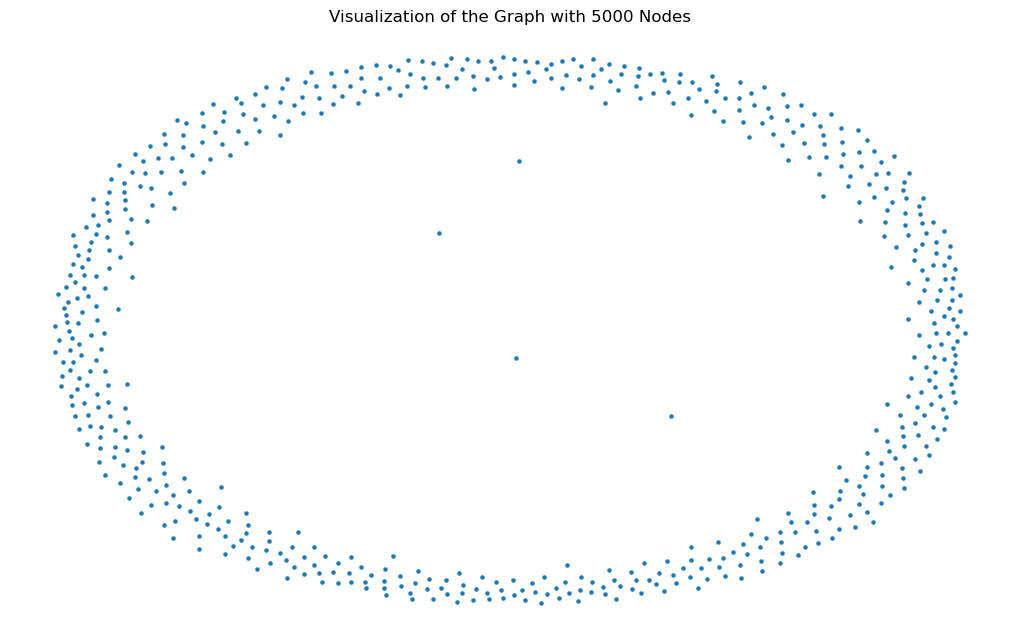

In [122]:
import matplotlib.pyplot as plt
import scipy
plt.figure(figsize=(10, 6))
nx.draw(G, node_size=5)
plt.title("Visualization of the Graph with 5000 Nodes")
plt.show()

In [149]:
time_value_max = 60
device_value_max = 10
vTime, vDevice = 1, 1
count = 0
for node in G.nodes():
    # 为每个节点添加两个属性值，可以根据需要进行修改
    if vTime <= time_value_max and vDevice <= device_value_max:
        nx.set_node_attributes(G, {node: {'timestamp': vTime, 'device_id': vDevice }})
        count += 1
        vTime += 1
        if vTime == time_value_max + 1 and vDevice == device_value_max:
            print("Already finished: " + str(count) + " nodes has been processed")
        continue
    elif vTime == time_value_max + 1 and vDevice <= device_value_max:
        if vDevice == device_value_max:
            break
        else:
            print("vDevice go ...")
            vTime = 0
            vDevice += 1
            nx.set_node_attributes(G, {node: {'timestamp': vTime, 'device_id': vDevice }})
            count += 1
            vTime += 1

vDevice go ...
vDevice go ...
vDevice go ...
vDevice go ...
vDevice go ...
vDevice go ...
vDevice go ...
vDevice go ...
vDevice go ...


In [151]:
import math
def init_edge_weights(G):
    count = 0
    zero_count = 0
    # 必须加上data=True才可以迭代
    for u, u_attrs in G.nodes(data=True):
        for v, v_attrs in G.nodes(data=True):
            if u != v:
                # 计算边的权重为两个节点的 timestamp 和 device_id 分别作差后的平方和
                weight = round(math.sqrt((u_attrs['timestamp'] - v_attrs['timestamp']) ** 2 + (u_attrs['device_id'] - v_attrs['device_id']) ** 2))
                if weight == 0:
                    zero_count += 1
                # 添加边到图中，并附带权重信息
                G.add_edge(u, v, weight=weight)
                count += 1
    print(count)
    print(zero_count)
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

In [152]:
init_edge_weights(G)

359400
0
Number of nodes: 600
Number of edges: 179700


In [153]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 600
Number of edges: 179700


In [154]:
for u, v, attrs in G.edges(data=True):
    print("Edge:", u, "-", v, ", Weight:", attrs['weight'])

Edge: 0 - 1 , Weight: 1
Edge: 0 - 2 , Weight: 2
Edge: 0 - 3 , Weight: 3
Edge: 0 - 4 , Weight: 4
Edge: 0 - 5 , Weight: 5
Edge: 0 - 6 , Weight: 6
Edge: 0 - 7 , Weight: 7
Edge: 0 - 8 , Weight: 8
Edge: 0 - 9 , Weight: 9
Edge: 0 - 10 , Weight: 10
Edge: 0 - 11 , Weight: 11
Edge: 0 - 12 , Weight: 12
Edge: 0 - 13 , Weight: 13
Edge: 0 - 14 , Weight: 14
Edge: 0 - 15 , Weight: 15
Edge: 0 - 16 , Weight: 16
Edge: 0 - 17 , Weight: 17
Edge: 0 - 18 , Weight: 18
Edge: 0 - 19 , Weight: 19
Edge: 0 - 20 , Weight: 20
Edge: 0 - 21 , Weight: 21
Edge: 0 - 22 , Weight: 22
Edge: 0 - 23 , Weight: 23
Edge: 0 - 24 , Weight: 24
Edge: 0 - 25 , Weight: 25
Edge: 0 - 26 , Weight: 26
Edge: 0 - 27 , Weight: 27
Edge: 0 - 28 , Weight: 28
Edge: 0 - 29 , Weight: 29
Edge: 0 - 30 , Weight: 30
Edge: 0 - 31 , Weight: 31
Edge: 0 - 32 , Weight: 32
Edge: 0 - 33 , Weight: 33
Edge: 0 - 34 , Weight: 34
Edge: 0 - 35 , Weight: 35
Edge: 0 - 36 , Weight: 36
Edge: 0 - 37 , Weight: 37
Edge: 0 - 38 , Weight: 38
Edge: 0 - 39 , Weight: 39
Edge

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [156]:
alpha = 0.8
for query in query_set:
    queried_nodes = [node for node, attributes in G.nodes(data=True) if attributes['timestamp'] >= query[0][0] and attributes['timestamp'] <= query[0][1] and attributes['device_id'] >= query[1][0] and attributes['device_id'] <= query[1][1]]
    for u, v, attrs in G.edges(data=True):
        if u in queried_nodes and v in queried_nodes:
            attrs['weight'] = alpha * G.edges[u, v]['weight'] + (1 - alpha) * G.edges[v, u]['weight']
        else:
            attrs['weight'] = alpha * G.edges[u, v]['weight']

In [157]:
for u, v, attrs in G.edges(data=True):
    print("Edge:", u, "-", v, ", Weight:", attrs['weight'])

Edge: 0 - 1 , Weight: 1.517710072051359e-09
Edge: 0 - 2 , Weight: 3.035420144102718e-09
Edge: 0 - 3 , Weight: 4.553130216154077e-09
Edge: 0 - 4 , Weight: 6.070840288205436e-09
Edge: 0 - 5 , Weight: 6.070840288205436e-09
Edge: 0 - 6 , Weight: 7.285008345846523e-09
Edge: 0 - 7 , Weight: 8.499176403487606e-09
Edge: 0 - 8 , Weight: 6.2165404551223675e-09
Edge: 0 - 9 , Weight: 6.993608012012658e-09
Edge: 0 - 10 , Weight: 3.978585891278316e-09
Edge: 0 - 11 , Weight: 4.376444480406145e-09
Edge: 0 - 12 , Weight: 3.0555539645017466e-09
Edge: 0 - 13 , Weight: 3.3101834615435554e-09
Edge: 0 - 14 , Weight: 3.5648129585853687e-09
Edge: 0 - 15 , Weight: 3.819442455627183e-09
Edge: 0 - 16 , Weight: 4.074071952668996e-09
Edge: 0 - 17 , Weight: 4.328701449710805e-09
Edge: 0 - 18 , Weight: 3.6666647574020932e-09
Edge: 0 - 19 , Weight: 3.870368355035546e-09
Edge: 0 - 20 , Weight: 4.074071952668996e-09
Edge: 0 - 21 , Weight: 4.277775550302444e-09
Edge: 0 - 22 , Weight: 4.4814791479358935e-09
Edge: 0 - 23 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [166]:
from networkx.algorithms.community import lukes_partitioning
partition = lukes_partitioning(G, max_size=10, edge_weight='weight')

NotATree: lukes_partitioning works only on trees

In [ ]:
from networkx import spectral_clustering

In [164]:
partition

dict_values([{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

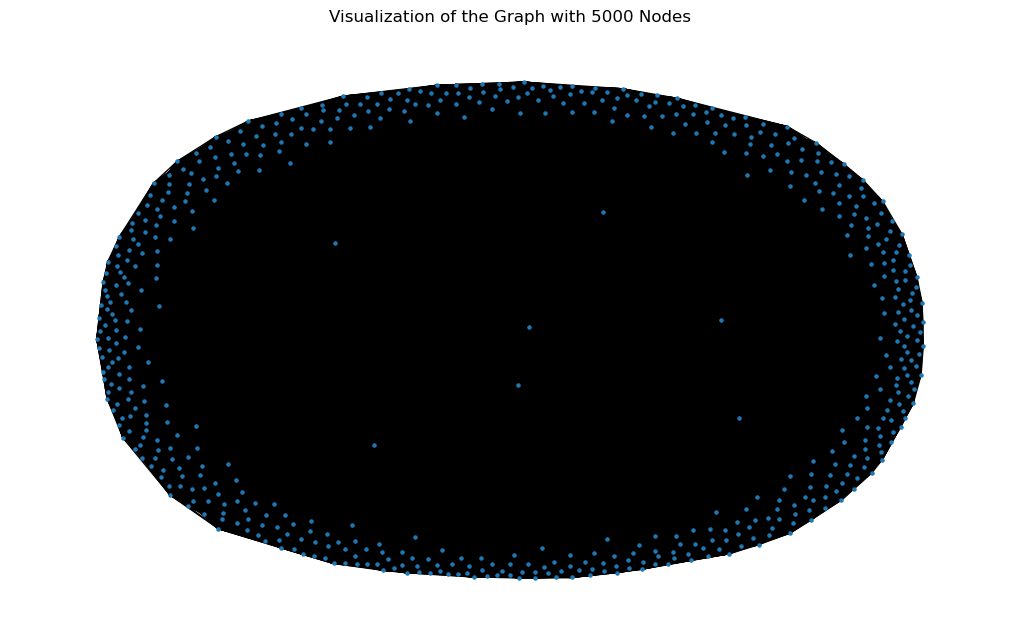

In [158]:
plt.figure(figsize=(10, 6))
nx.draw(G, node_size=5)
plt.title("Visualization of the Graph with 5000 Nodes")
plt.show()